##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### 0. Set up Workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
####################### Set up directory structure ######################
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import co2_concentrations
from plants_and_TCR.analysis_parameters import params
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.analyze_data import moving_average as movingaverage
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.process_data import calculate_pi_baseline
from plants_and_TCR.generate_figures import plot_scatter_CMIP

CDICT_NAMES=params.CDICT_NAMES
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES
#PATH_DATA=directory_information.'/eos9/czarakas/Code/CMIP_Analysis/Data/Intermediate_Data/'

CO2_1PCTCO2 = co2_concentrations.co2_1pctco2
DEFAULT_VARNAME = params.DEFAULT_VARNAME
CDICT_NAMES = params.CDICT_NAMES
runnames_all = params.RUNNAMES_ALL
CMIP_linestyles = params.CMIP_LINESTYLES

In [4]:
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

### Calculate TCRs

In [26]:
importlib.reload(calculate_tcr_time_series)
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['TOT-RAD','TOT', 'RAD','PHYS'],
                                                         average_types=['global'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=False)

Exception ignored in: <function CachingFileManager.__del__ at 0x7fce8000d840>
Traceback (most recent call last):
  File "/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/backends/file_manager.py", line 223, in __del__
    def __del__(self):
KeyboardInterrupt

KeyboardInterrupt



In [5]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

### 1. Figure 1a: Time Series

In [6]:
from plants_and_TCR.generate_figures import plot_climate_response_timeseries

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


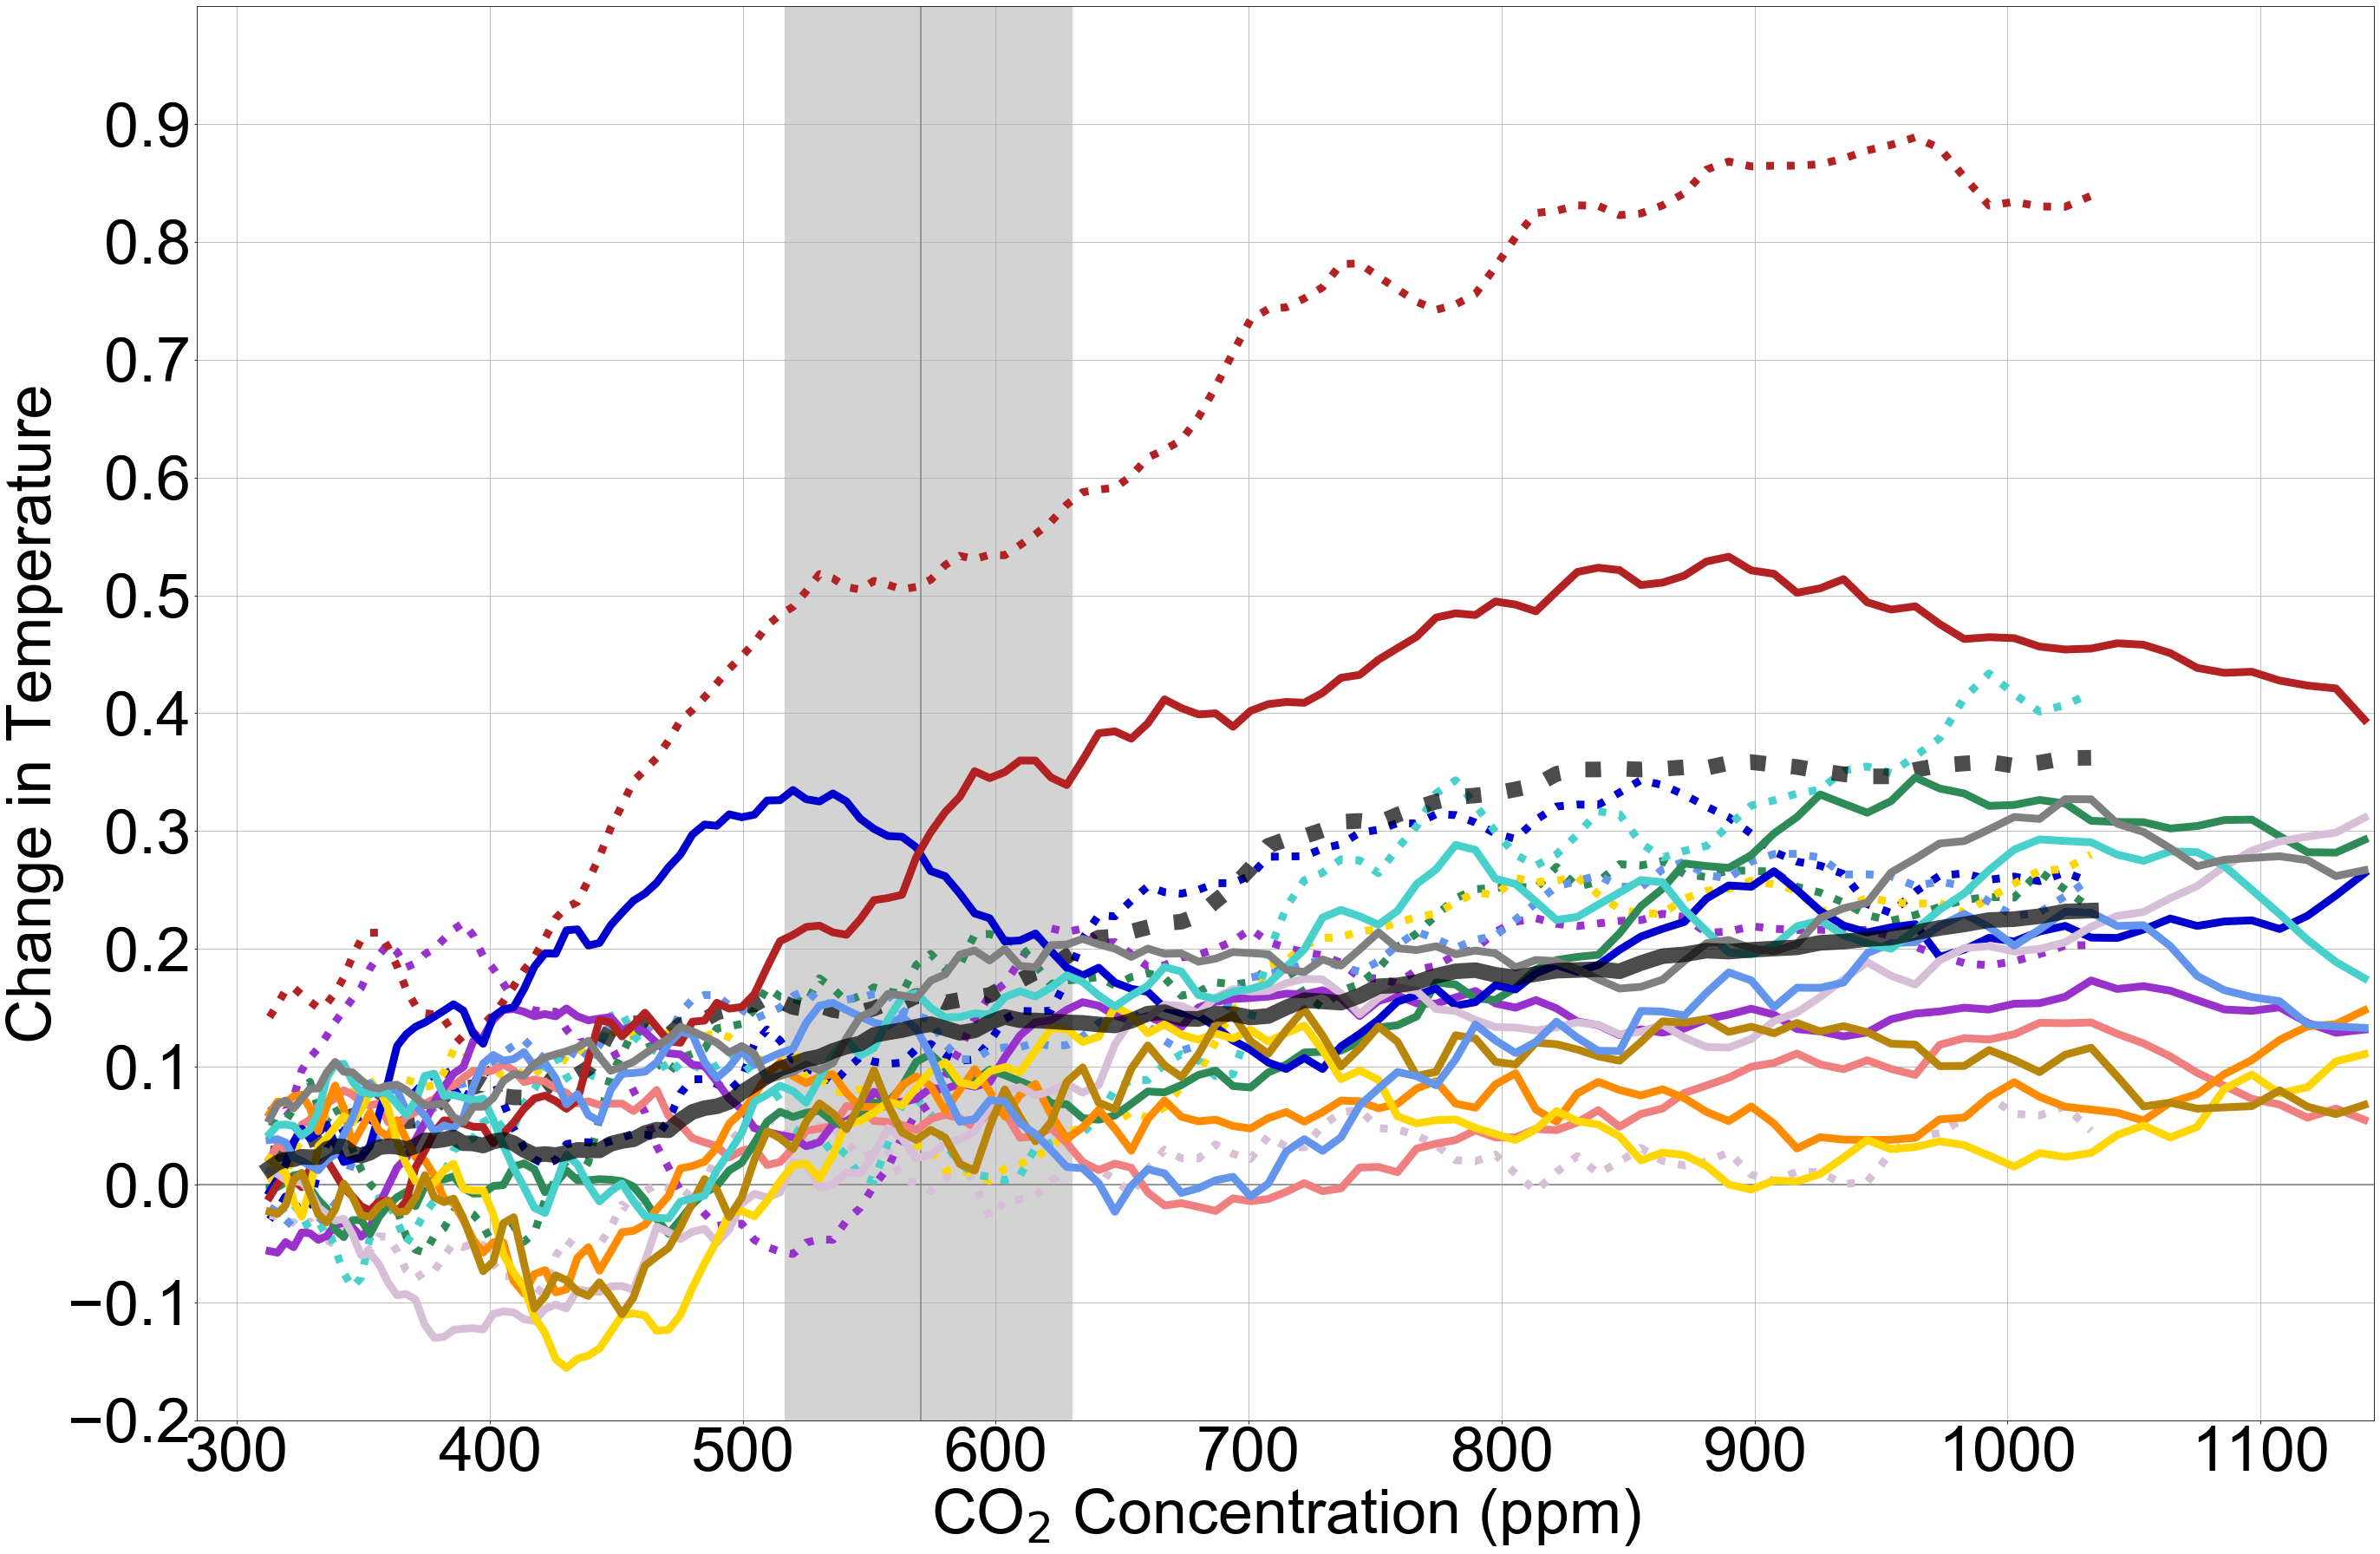

In [10]:
TCR_TYPE='TOT-RAD'
fig = plot_climate_response_timeseries.plot_climate_response_timeseries(averageType='global',
                                                                        tcr_type=TCR_TYPE,
                                                                        ylims=[-0.2,1.0],
                                                                        plttitle='TempChange',
                                                                        tcr_dict=TCR_DICT,
                                                                        legend_on=False,
                                                                        #dt=0.5,
                                                                        #fig_size=[25,30],
                                                                        filepath=PATH_FIGURES+TCR_TYPE+'_TCR')#PATH_FIGURES+'Figure1a_TimeSeries_delta_T_phys')

### 2. Figure 1b: Scatter Plot

In [11]:
END_YR = 70
AVERAGE_TYPE = 'global'
ds_tcr = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                           end_yr=END_YR,
                                           varname='tas',
                                           average_type=AVERAGE_TYPE,
                                           tcr_types=['TOT-RAD','TOT'])

TOT = ds_tcr['TOT']
PHYS= ds_tcr['TOT-RAD']
PCT_PHYS = PHYS*100/TOT

xvals = PCT_PHYS
yvals = PHYS

In [12]:
XLABEL = 'Percentage of Total TCR'
YLABEL = 'Physiological TCR'
XLIMS = [-5, 25]
YLIMS = [-0.2, 1.0]
FILEPATH = None

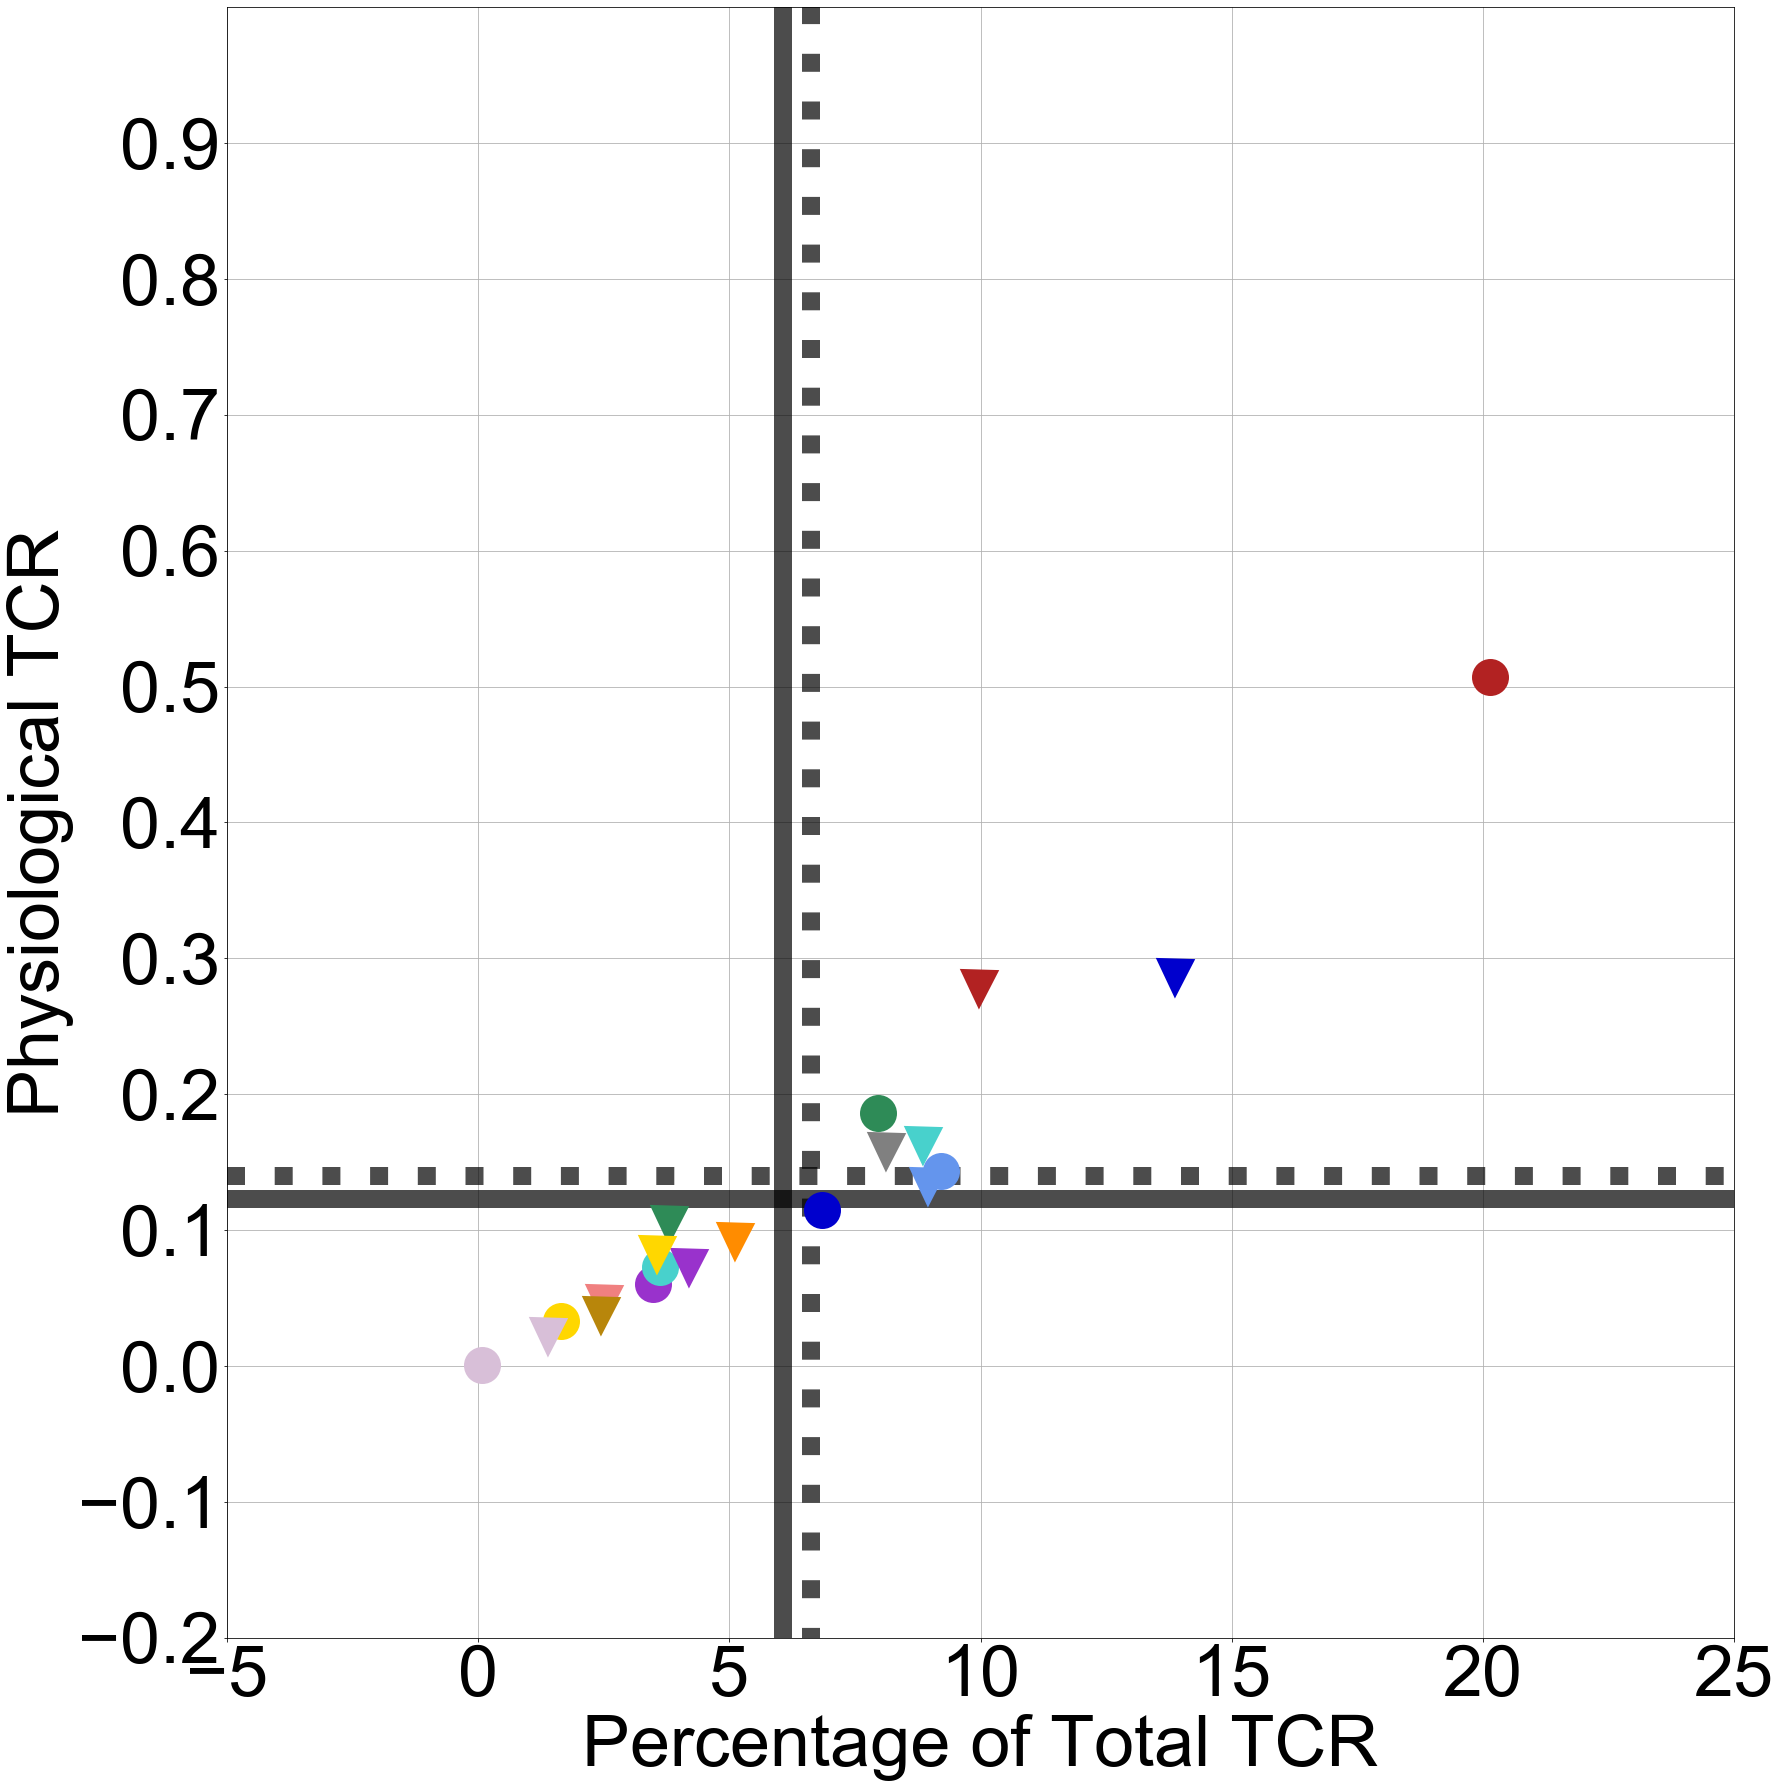

In [30]:
from plants_and_TCR.generate_figures import plot_scatter_CMIP
import importlib
importlib.reload(plot_scatter_CMIP)
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=False,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True, fig_dims=[27,30], dt=0.1,
                                   filepath=PATH_FIGURES+'Figure1a')

### 3. Generator numbers for in text

#### All Models, 2xCO2
* In CMIP6, PHYS contributes A ± B° (range of C-D°) to the TCR
* corresponding to to E ± F% of the full TCR (and a range of G-H%)
* In CMIP5 models, PHY contributes I ± J°C (and a range of K-L°C) to the TCR
* corresponding to M ± N% of the full TCR (and a range of O-P%)

#### Same Model Subset, 2xCO2
* mean TCRPHYS across models remained roughly constant (Table S4).
* TCRPHYS increased for Q/R models

#### All Models, 4xCO2
* by 4xCO2, physiologically-forced warming reaches S-T° (U-V%) of warming (mean: W°, X%)

In [14]:
globalTCR_2xco2 = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr=70, varname='tas', average_type='global', 
                                                    tcr_types=['TOT','RAD','TOT-RAD','PHYS'])
globalTCR_2xco2['TOT-RAD_pct'] = globalTCR_2xco2['TOT-RAD']*100/globalTCR_2xco2['TOT']
globalTCR_2xco2_cmip5 = globalTCR_2xco2[0:8]
globalTCR_2xco2_cmip6 = globalTCR_2xco2[8:100]

globalTCR_4xco2 = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr=130, varname='tas', average_type='global', 
                                                    tcr_types=['TOT','RAD','TOT-RAD','PHYS'])
globalTCR_4xco2['TOT-RAD_pct'] = globalTCR_4xco2['TOT-RAD']*100/globalTCR_4xco2['TOT']
globalTCR_4xco2_cmip5 = globalTCR_4xco2[0:8]
globalTCR_4xco2_cmip6 = globalTCR_4xco2[8:100]

In [15]:
A = np.round(globalTCR_2xco2_cmip6['TOT-RAD'].mean(),2)
print('CMIP6 Mean TCRphys = '+str(A))
B = np.round(globalTCR_2xco2_cmip6['TOT-RAD'].std(),2)
print('CMIP6 Stddev TCRphys = '+str(B))
C = np.round(globalTCR_2xco2_cmip6['TOT-RAD'].min(),2)
D = np.round(globalTCR_2xco2_cmip6['TOT-RAD'].max(),2)
print('CMIP6 Range TCRphys = '+str(C)+' - '+str(D))

G = np.round(globalTCR_2xco2_cmip6['TOT-RAD_pct'].mean(),1) #Mean of Percents
G_v2 = np.round(globalTCR_2xco2_cmip6['TOT-RAD'].mean()*100/globalTCR_2xco2_cmip6['TOT'].mean(),2) #Percents of Means
print('CMIP6 Mean % TCRphys = '+str(G))
F = np.round(globalTCR_2xco2_cmip6['TOT-RAD_pct'].std(),1)
print('CMIP6 Stddev % TCRphys = '+str(F))
G = np.round(globalTCR_2xco2_cmip6['TOT-RAD_pct'].min(),1)
H = np.round(globalTCR_2xco2_cmip6['TOT-RAD_pct'].max(),1)
print('CMIP6 Range % TCRphys = '+str(G)+'% - '+str(H)+'%')

CMIP6 Mean TCRphys = 0.12
CMIP6 Stddev TCRphys = 0.09
CMIP6 Range TCRphys = 0.02 - 0.29
CMIP6 Mean % TCRphys = 6.1
CMIP6 Stddev % TCRphys = 3.8
CMIP6 Range % TCRphys = 1.4% - 13.9%


In [16]:
I = np.round(globalTCR_2xco2_cmip5['TOT-RAD'].mean(),2)
print('CMIP5 Mean TCRphys = '+str(I))
J = np.round(globalTCR_2xco2_cmip5['TOT-RAD'].std(),2)
print('CMIP5 Stddev TCRphys = '+str(J))
K = np.round(globalTCR_2xco2_cmip5['TOT-RAD'].min(),2)
L = np.round(globalTCR_2xco2_cmip5['TOT-RAD'].max(),2)
print('CMIP5 Range TCRphys = '+str(K)+' - '+str(L))

M = np.round(globalTCR_2xco2_cmip5['TOT-RAD_pct'].mean(),1) #Mean of Percents
M_v2 = np.round(globalTCR_2xco2_cmip5['TOT-RAD'].mean()*100/globalTCR_2xco2_cmip5['TOT'].mean(),2) #Percents of Means
print('CMIP5 Mean % TCRphys = '+str(M))
N = np.round(globalTCR_2xco2_cmip5['TOT-RAD_pct'].std(),1)
print('CMIP5 Stddev % TCRphys = '+str(N))
O = np.round(globalTCR_2xco2_cmip5['TOT-RAD_pct'].min(),1)
P = np.round(globalTCR_2xco2_cmip5['TOT-RAD_pct'].max(),1)
print('CMIP5 Range % TCRphys = '+str(O)+'% - '+str(P)+'%')

CMIP5 Mean TCRphys = 0.14
CMIP5 Stddev TCRphys = 0.16
CMIP5 Range TCRphys = 0.0 - 0.51
CMIP5 Mean % TCRphys = 6.6
CMIP5 Stddev % TCRphys = 6.3
CMIP5 Range % TCRphys = 0.1% - 20.1%


In [17]:
A = np.round(globalTCR_4xco2_cmip6['TOT-RAD'].mean(),2)
print('4xCO2 CMIP6 Mean TCRphys = '+str(A))
B = np.round(globalTCR_4xco2_cmip6['TOT-RAD'].std(),2)
print('4xCO2 CMIP6 Stddev TCRphys = '+str(B))
C = np.round(globalTCR_4xco2_cmip6['TOT-RAD'].min(),2)
D = np.round(globalTCR_4xco2_cmip6['TOT-RAD'].max(),2)
print('4xCO2 CMIP6 Range TCRphys = '+str(C)+' - '+str(D))

G = np.round(globalTCR_4xco2_cmip6['TOT-RAD_pct'].mean(),2) #Mean of Percents
G_v2 = np.round(globalTCR_4xco2_cmip6['TOT-RAD'].mean()*100/globalTCR_4xco2_cmip6['TOT'].mean(),2) #Percents of Means
print('4xCO2 CMIP6 Mean % TCRphys = '+str(G))
F = np.round(globalTCR_4xco2_cmip6['TOT-RAD_pct'].std(),2)
print('4xCO2 CMIP6 Stddev % TCRphys = '+str(F))
G = np.round(globalTCR_4xco2_cmip6['TOT-RAD_pct'].min(),2)
H = np.round(globalTCR_4xco2_cmip6['TOT-RAD_pct'].max(),2)
print('4xCO2 CMIP6 Range % TCRphys = '+str(G)+'% - '+str(H)+'%')

4xCO2 CMIP6 Mean TCRphys = 0.21
4xCO2 CMIP6 Stddev TCRphys = 0.12
4xCO2 CMIP6 Range TCRphys = 0.03 - 0.45
4xCO2 CMIP6 Mean % TCRphys = 4.94
4xCO2 CMIP6 Stddev % TCRphys = 2.45
4xCO2 CMIP6 Range % TCRphys = 0.51% - 7.93%
